In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [16]:

os.getcwd()

'C:\\Windows\\System32'

In [26]:
os.chdir('C:\\Users\\aditi mishra\\Downloads\\archive (1)')

In [28]:
df = pd.read_csv('website_wata.csv')

In [30]:
# Display first few rows to understand the structure
print("Dataset Preview:\n", df.head())

Dataset Preview:
    Page Views  Session Duration  Bounce Rate Traffic Source  Time on Page  \
0           5         11.051381     0.230652        Organic      3.890460   
1           4          3.429316     0.391001         Social      8.478174   
2           4          1.621052     0.397986        Organic      9.636170   
3           5          3.629279     0.180458        Organic      2.071925   
4           5          4.235843     0.291541           Paid      1.960654   

   Previous Visits  Conversion Rate  
0                3              1.0  
1                0              1.0  
2                2              1.0  
3                3              1.0  
4                5              1.0  


In [31]:

# Check for any missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 Page Views          0
Session Duration    0
Bounce Rate         0
Traffic Source      0
Time on Page        0
Previous Visits     0
Conversion Rate     0
dtype: int64


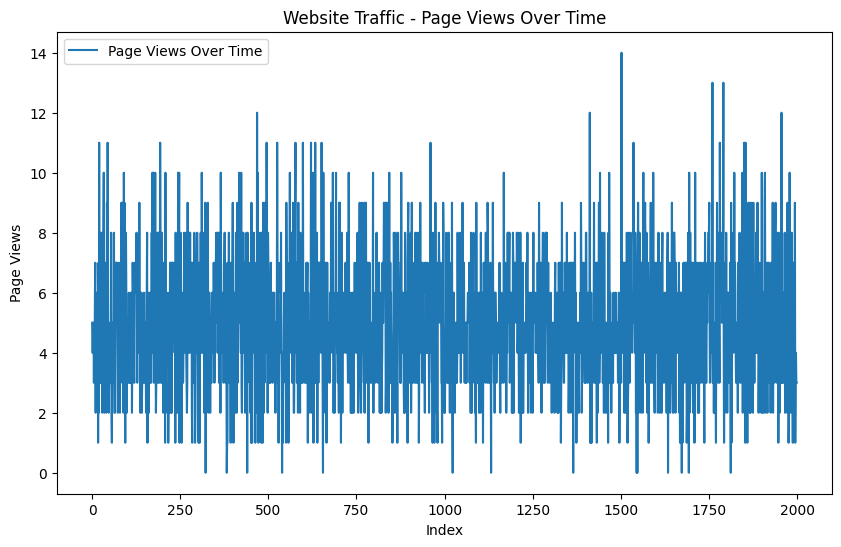

In [32]:
# If there are missing values, you may fill them or drop them
# df = df.fillna(method='ffill')  # Forward fill or you can choose another method

# Step 3: Visualizing the data (Page Views over time)
plt.figure(figsize=(10, 6))
plt.plot(df['Page Views'], label='Page Views Over Time')
plt.xlabel('Index')
plt.ylabel('Page Views')
plt.title('Website Traffic - Page Views Over Time')
plt.legend()
plt.show()

In [34]:
# Extracting 'Page Views' as the target metric for time series forecasting
page_views = df['Page Views']


In [35]:
# Split the data into training and testing sets
train_size = int(len(page_views) * 0.80)
train, test = page_views[:train_size], page_views[train_size:]


In [36]:
# Build and fit the ARIMA model
# The order of ARIMA(p, d, q) can be tuned. Here we use (5, 1, 0) as an example
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

In [37]:
# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))

In [38]:
# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error on Test Data: {mse:.2f}')

Mean Squared Error on Test Data: 5.70


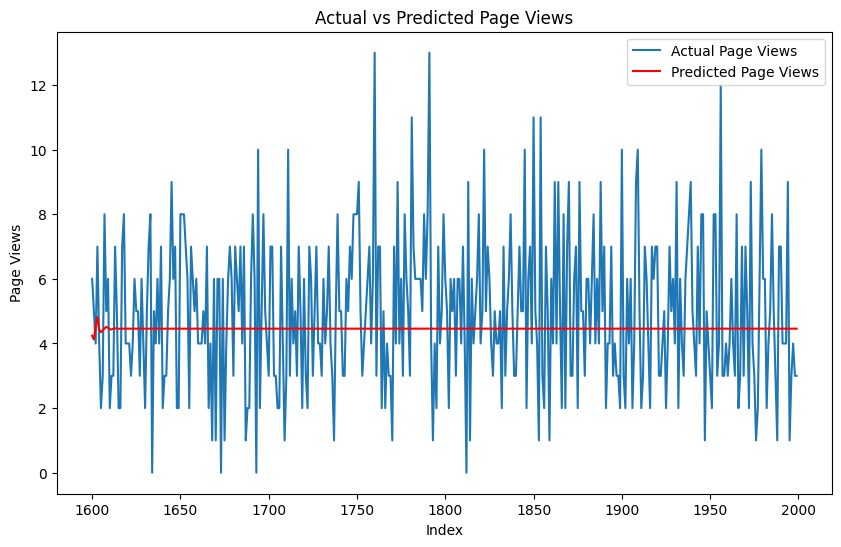

In [39]:
#Visualize the Actual vs Predicted Page Views on test data
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Page Views')
plt.plot(test.index, predictions, color='red', label='Predicted Page Views')
plt.xlabel('Index')
plt.ylabel('Page Views')
plt.title('Actual vs Predicted Page Views')
plt.legend()
plt.show()

In [40]:
#Forecast future traffic for the next 30 periods
forecast_period = 30
future_forecast = model_fit.forecast(steps=forecast_period)

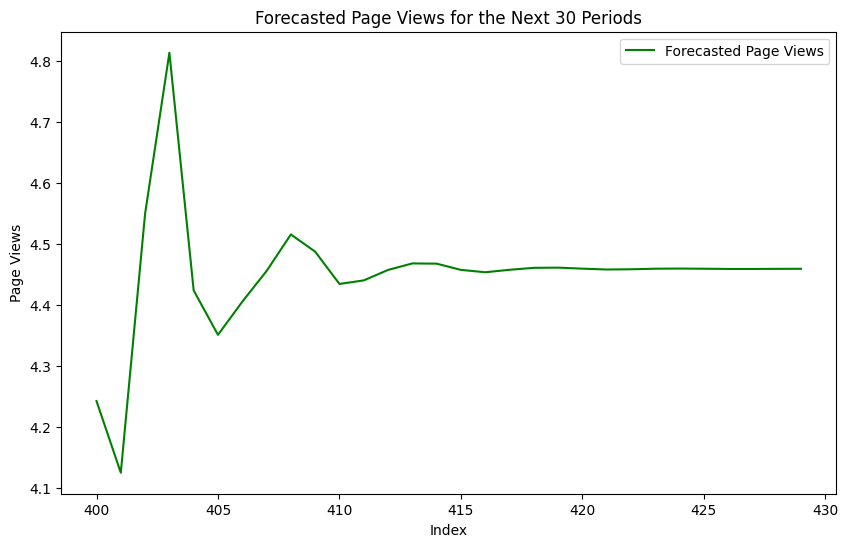

In [41]:
#Visualize the forecasted Page Views for the next 30 periods
plt.figure(figsize=(10, 6))
plt.plot(pd.RangeIndex(start=len(test), stop=len(test) + forecast_period, step=1), future_forecast, color='green', label='Forecasted Page Views')
plt.xlabel('Index')
plt.ylabel('Page Views')
plt.title('Forecasted Page Views for the Next 30 Periods')
plt.legend()
plt.show()

In [42]:
# Analyze and interpret the results
print("\nForecasted Page Views for the next 30 periods:\n", future_forecast)


Forecasted Page Views for the next 30 periods:
 1600    4.242653
1601    4.125224
1602    4.549671
1603    4.813453
1604    4.423866
1605    4.351194
1606    4.405442
1607    4.455764
1608    4.515653
1609    4.487508
1610    4.434547
1611    4.440381
1612    4.457515
1613    4.468190
1614    4.467797
1615    4.457635
1616    4.453703
1617    4.457756
1618    4.460952
1619    4.461293
1620    4.459629
1621    4.458230
1622    4.458599
1623    4.459525
1624    4.459783
1625    4.459492
1626    4.459148
1627    4.459110
1628    4.459299
1629    4.459415
Name: predicted_mean, dtype: float64
